# Library and Function

In [1]:
import matplotlib.pyplot as plt
from numpy import sin, cos, pi
from scipy.special import erfc, gammaincc

In [2]:
def x_plus_1(x_i):
  return round(cos(17*x_i) * sin(8*x_i), 15)

def sub_plot(indice, data, title):
  plt.subplot(2, 3, indice)
  plt.title(title)
  plt.scatter(range(len(data)), data, marker=".")

# Generator

In [12]:
"""
  90  = pi/2
  60  = pi/3
  45  = pi/4
  30  = pi/6
  0   = 0
"""

kunci = [pi/3]  # fill with x0
data = {
  "kunci1" : [],
  "kunci2" : [],
  "kunci3" : [],
  "kunci4" : [],
  "kunci5" : [],
}
n_key = 3
# ex = True
for i in range(201):
  kunci.append(x_plus_1(kunci[i]))
  a = abs(kunci[-1])
  a = "{:<016s}".format(str(a).replace(".",""))
  a = [a[n-n_key:n] for n in range(len(a), 0, -n_key)]
  data["kunci1"].append(int(a[4]))
  data["kunci2"].append(int(a[3]))
  data["kunci3"].append(int(a[2]))
  data["kunci4"].append(int(a[1]))
  data["kunci5"].append(int(a[0]))
  # if kunci[-1] < 0 and ex:
  #   print(kunci[-1])
  #   print(a)
  #   ex = False



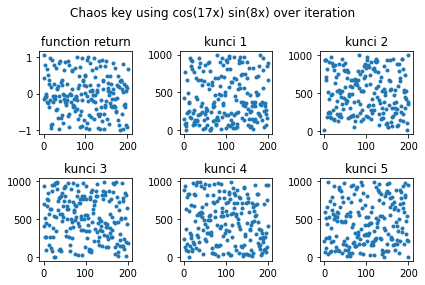

In [13]:
sub_plot(1, kunci, "function return")
sub_plot(2, data["kunci1"], "kunci 1")
sub_plot(3, data["kunci2"], "kunci 2")
sub_plot(4, data["kunci3"], "kunci 3")
sub_plot(5, data["kunci4"], "kunci 4")
sub_plot(6, data["kunci5"], "kunci 5")
plt.suptitle("Chaos key using cos(17x) sin(8x) over iteration")
plt.autoscale(True)
plt.tight_layout()
plt.show()

# Testing

In [14]:
"""Reference:
Rukhin, A., Soto, J., Nechvatal, J., Smid, M., & Barker, E. (2001).
A statistical test suite for random and pseudorandom number generators for cryptographic applications.
Booz-allen and hamilton inc mclean va.
"""

alpha = 1/100

## Monobit

In [15]:
def monobit(data):
  Sn = 0
  for k in data:
    if bin(k)[-1] == "1":
      Sn += 1
    else:
      Sn -= 1
  return erfc(abs(Sn)/((len(data)*2)**(1/2)))

In [16]:
for key, value in data.items():
  p_value = monobit(value)
  print("p-value: {}".format(round(p_value, 4)), end=", ")
  print("{} random".format(key)) if p_value >= alpha else print("{} not random".format(key))
  

p-value: 0.8324, kunci1 random
p-value: 0.9438, kunci2 random
p-value: 0.9438, kunci3 random
p-value: 0.6215, kunci4 random
p-value: 0.5256, kunci5 random


## Blockbit

In [17]:
def blockbit(data):
  M = 10
  N = int(len(data)/M)
  key = "".join([bin(i)[-1] for i in data])
  phis = []
  for k in range(0, len(key), M):
    if len(key[k:k+M]) == M:
      ones = 0
      for one in key[k:k+M]:
        if one == "1":
          ones += 1
      phis.append(ones/M)
  X_2 = 0
  for phi in phis:
    X_2 += (phi-1/2)**2
  X_2 = 4 * M * X_2
  p_value = gammaincc(N/2, X_2/2)
  return p_value
      

In [18]:
for key, value in data.items():
  p_value = blockbit(value)
  print("p-value: {}".format(round(p_value, 4)), end=", ")
  print("{} random".format(key)) if p_value >= alpha else print("{} not random".format(key))

p-value: 0.2424, kunci1 random
p-value: 0.7649, kunci2 random
p-value: 0.6915, kunci3 random
p-value: 0.5089, kunci4 random
p-value: 0.3405, kunci5 random


## Run-Test

In [19]:
def runtest(data):
  T = 2/(len(data)**(1/2))
  ones = 0
  for one in data:
    if bin(one)[-1] == "1":
      ones += 1
  phi = ones/len(data)
  prerequisite = abs(phi - 1/2) >= T
  if prerequisite:
    return 0.0000
  else:
    V_n = 1
    cek = bin(data[0])[-1]
    for i in data[1:]:
      if cek != bin(i)[-1]:
        V_n += 1
      cek = bin(i)[-1]
    p_value = erfc(
      (abs(V_n - 2*len(data)*phi*(1-phi))) / \
      (2*(2*len(data))**(1/2)*phi*(1-phi))
    )
    return p_value


In [20]:
for key, value in data.items():
  p_value = runtest(value)
  print("p-value: {}".format(round(p_value, 4)), end=", ")
  print("{} random".format(key)) if p_value >= alpha else print("{} not random".format(key))

p-value: 0.8299, kunci1 random
p-value: 0.1384, kunci2 random
p-value: 0.7246, kunci3 random
p-value: 0.7111, kunci4 random
p-value: 0.4203, kunci5 random
